In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import bayesflow as bf
import numpy as np
from matplotlib import pyplot as plt
from src.models.HmmEam import model, unconstrain_parameters, constrain_parameters, configurator

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
INFO:root:Performing 2 pilot runs with the anonymous model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 200, 3)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


In [2]:
#model.presimulate_and_save(batch_size=128, iterations_per_epoch=500, epochs=50, folder_path="training-data")

In [3]:
df = model(2_000)

In [4]:
rts = df['sim_data'][...,0]

(array([1.162e+03, 4.880e+02, 1.870e+02, 9.600e+01, 4.000e+01, 1.400e+01,
        7.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([1.14361430e-04, 1.68201315e-01, 3.36288268e-01, 5.04375221e-01,
        6.72462175e-01, 8.40549128e-01, 1.00863608e+00, 1.17672303e+00,
        1.34480999e+00, 1.51289694e+00, 1.68098389e+00]),
 <BarContainer object of 10 artists>)

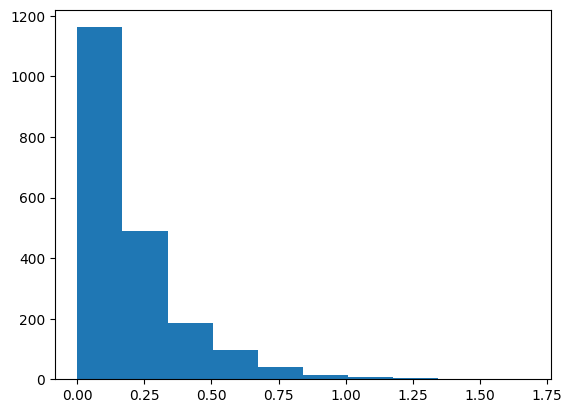

In [5]:
par = df['prior_draws']

plt.hist(par[..., 7])

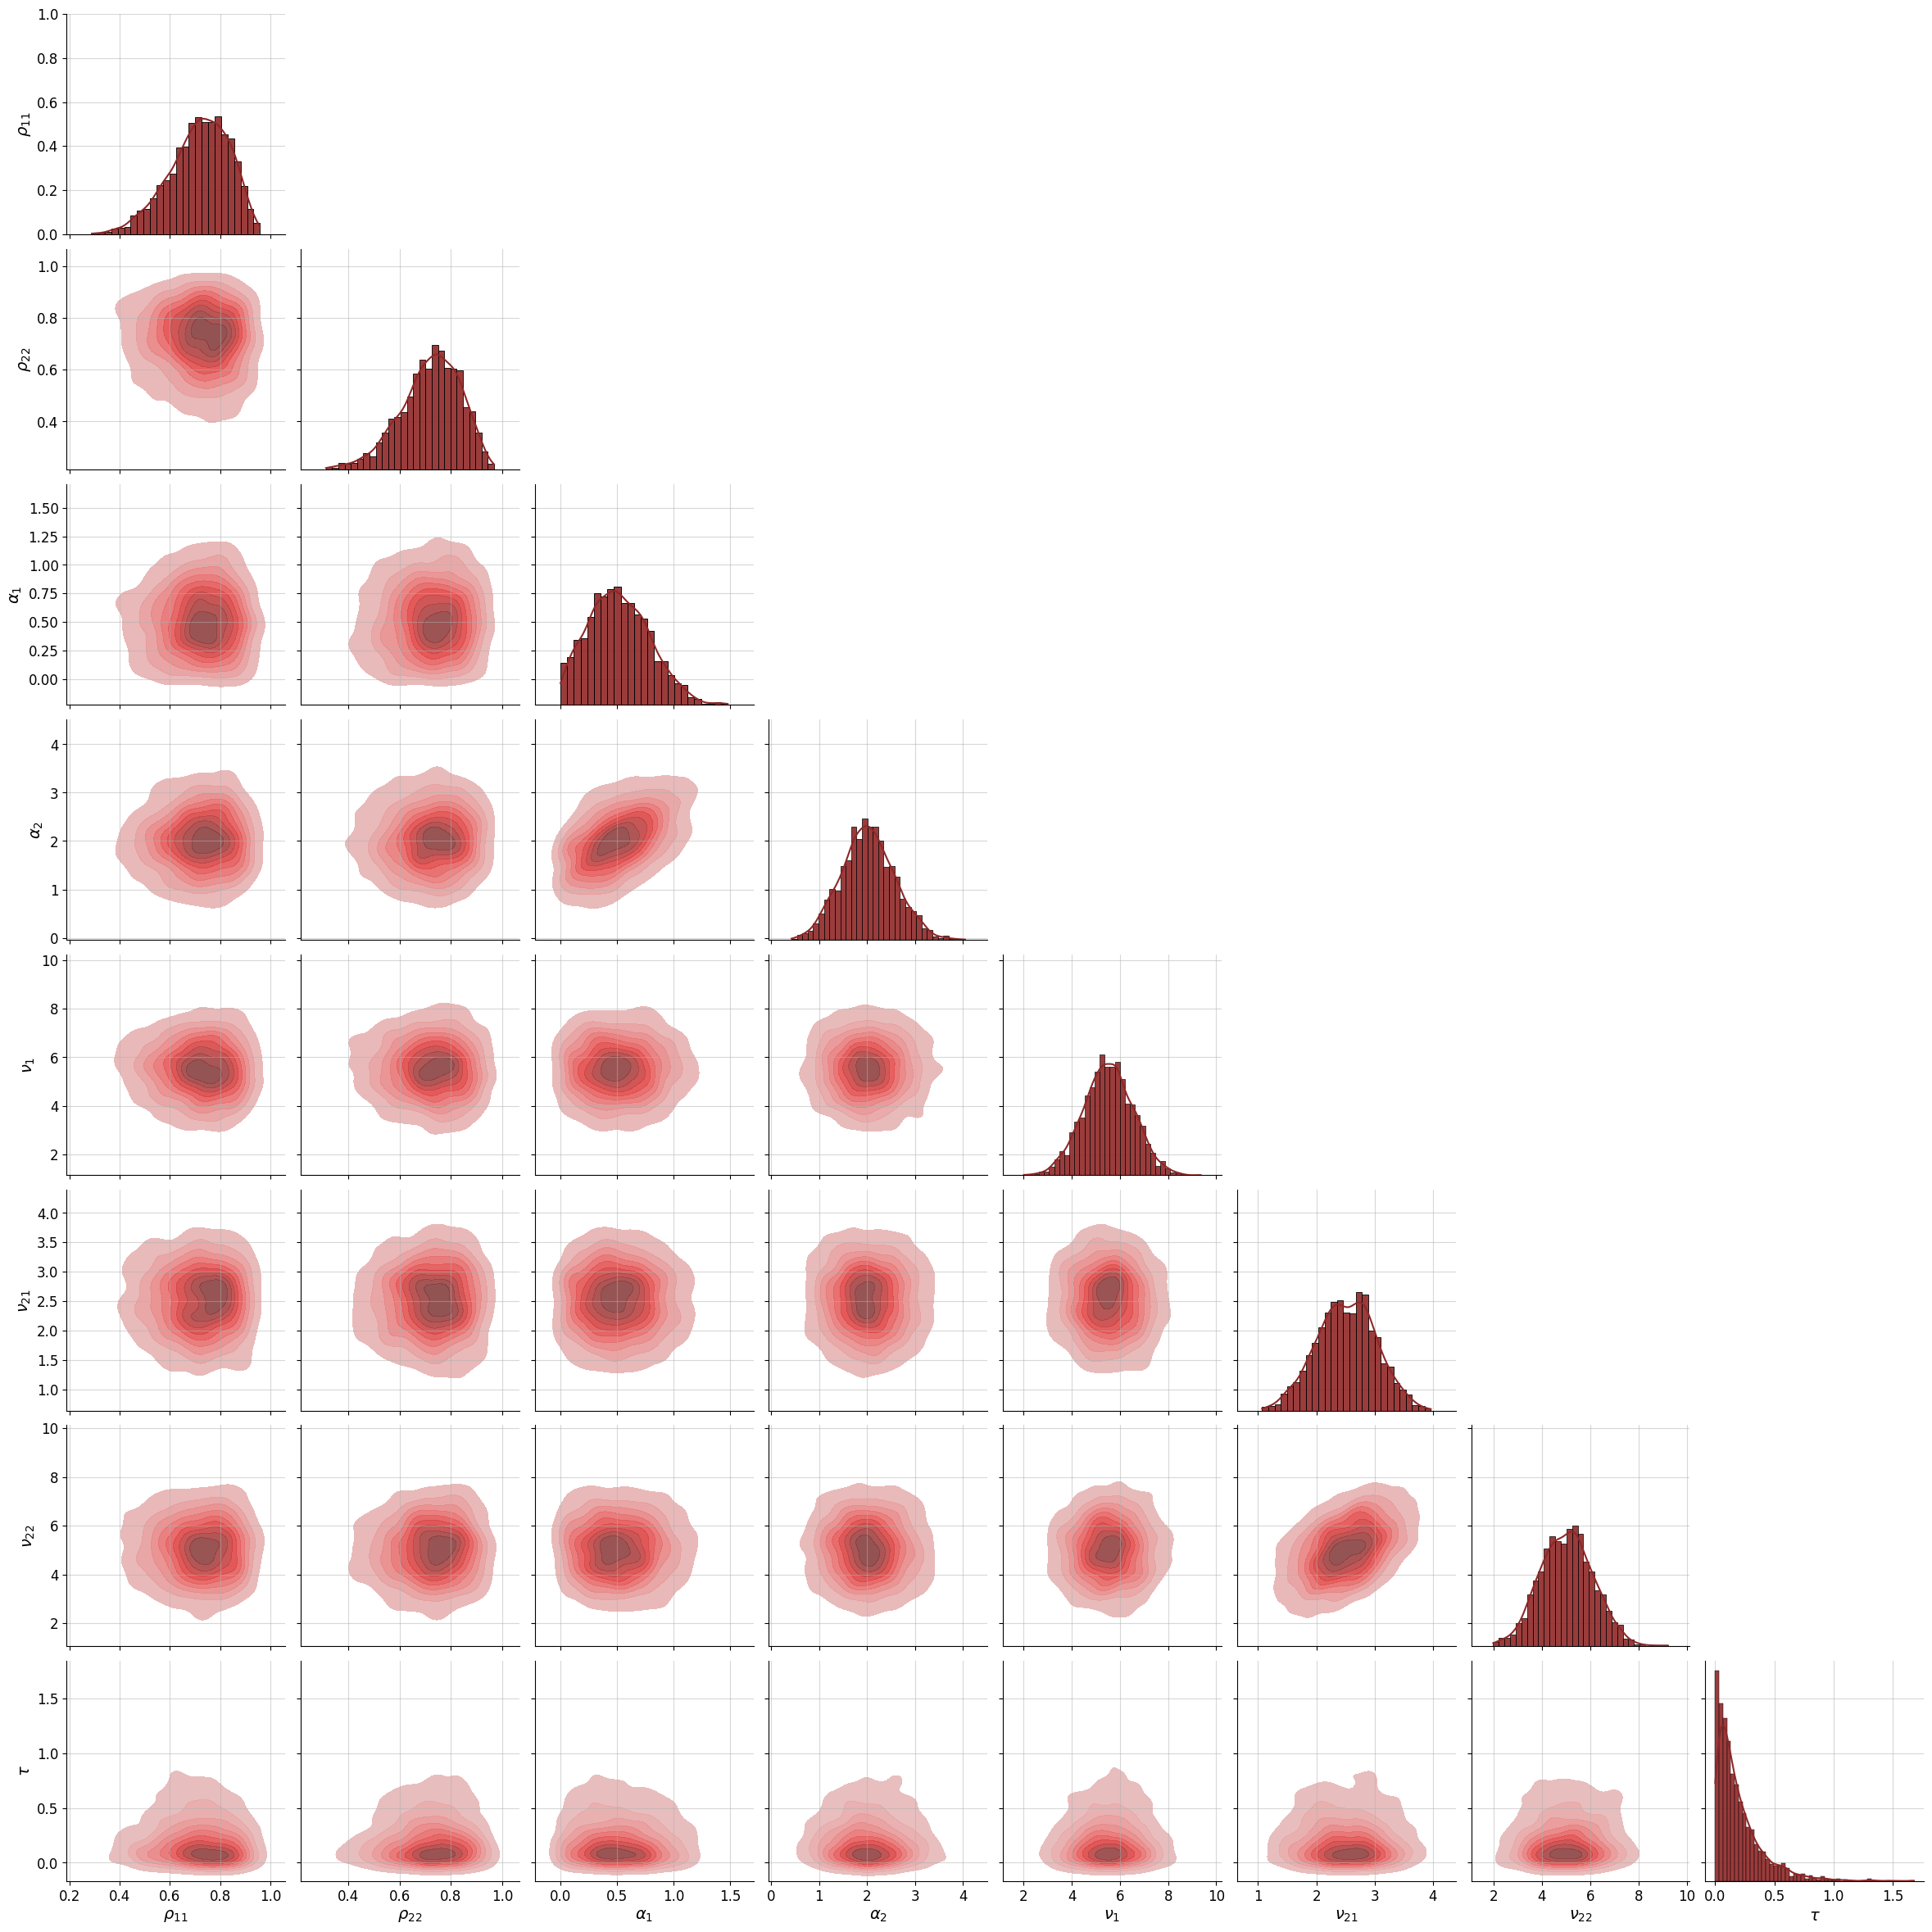

In [6]:
f=bf.diagnostics.plot_posterior_2d(df['prior_draws'], param_names=model.param_names["constrained"])

In [7]:
np.mean(df['prior_draws'], axis=0)

array([0.7160746 , 0.71947936, 0.51784537, 2.02077251, 5.51675053,
       2.51507542, 5.03269723, 0.19576505])

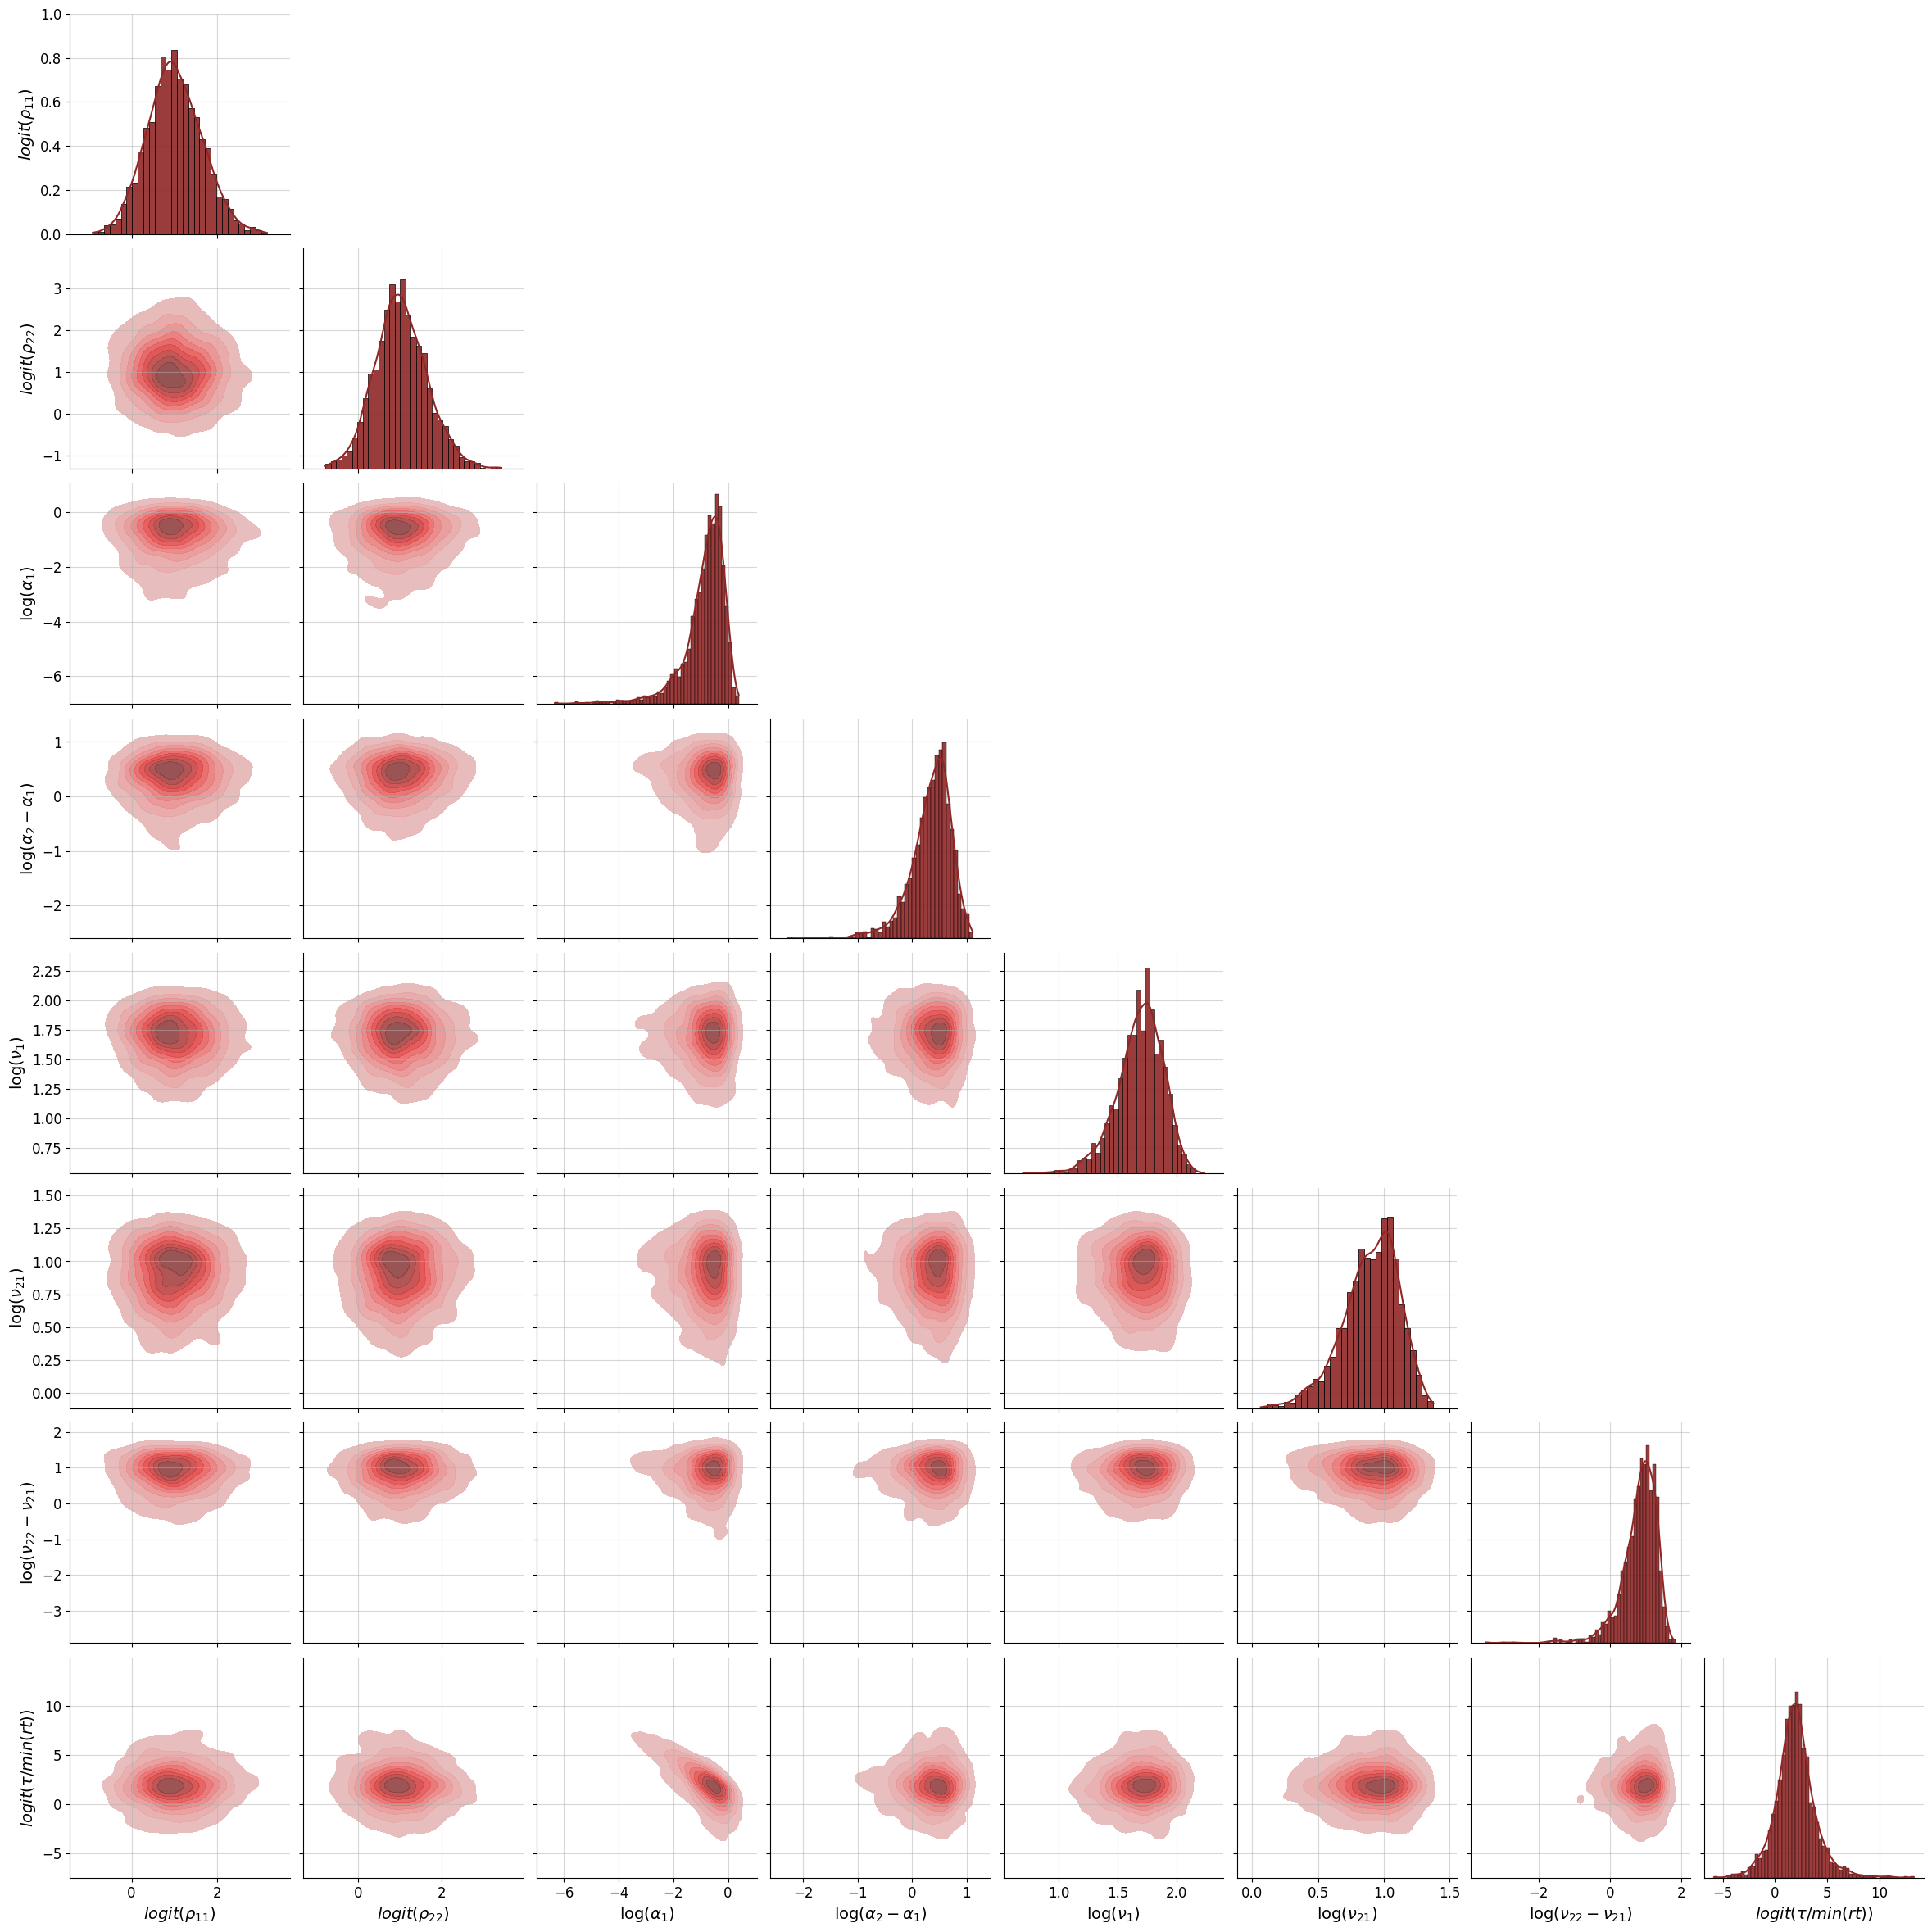

In [8]:
f=bf.diagnostics.plot_posterior_2d(unconstrain_parameters(df['prior_draws'], rts), param_names=model.param_names["unconstrained"])

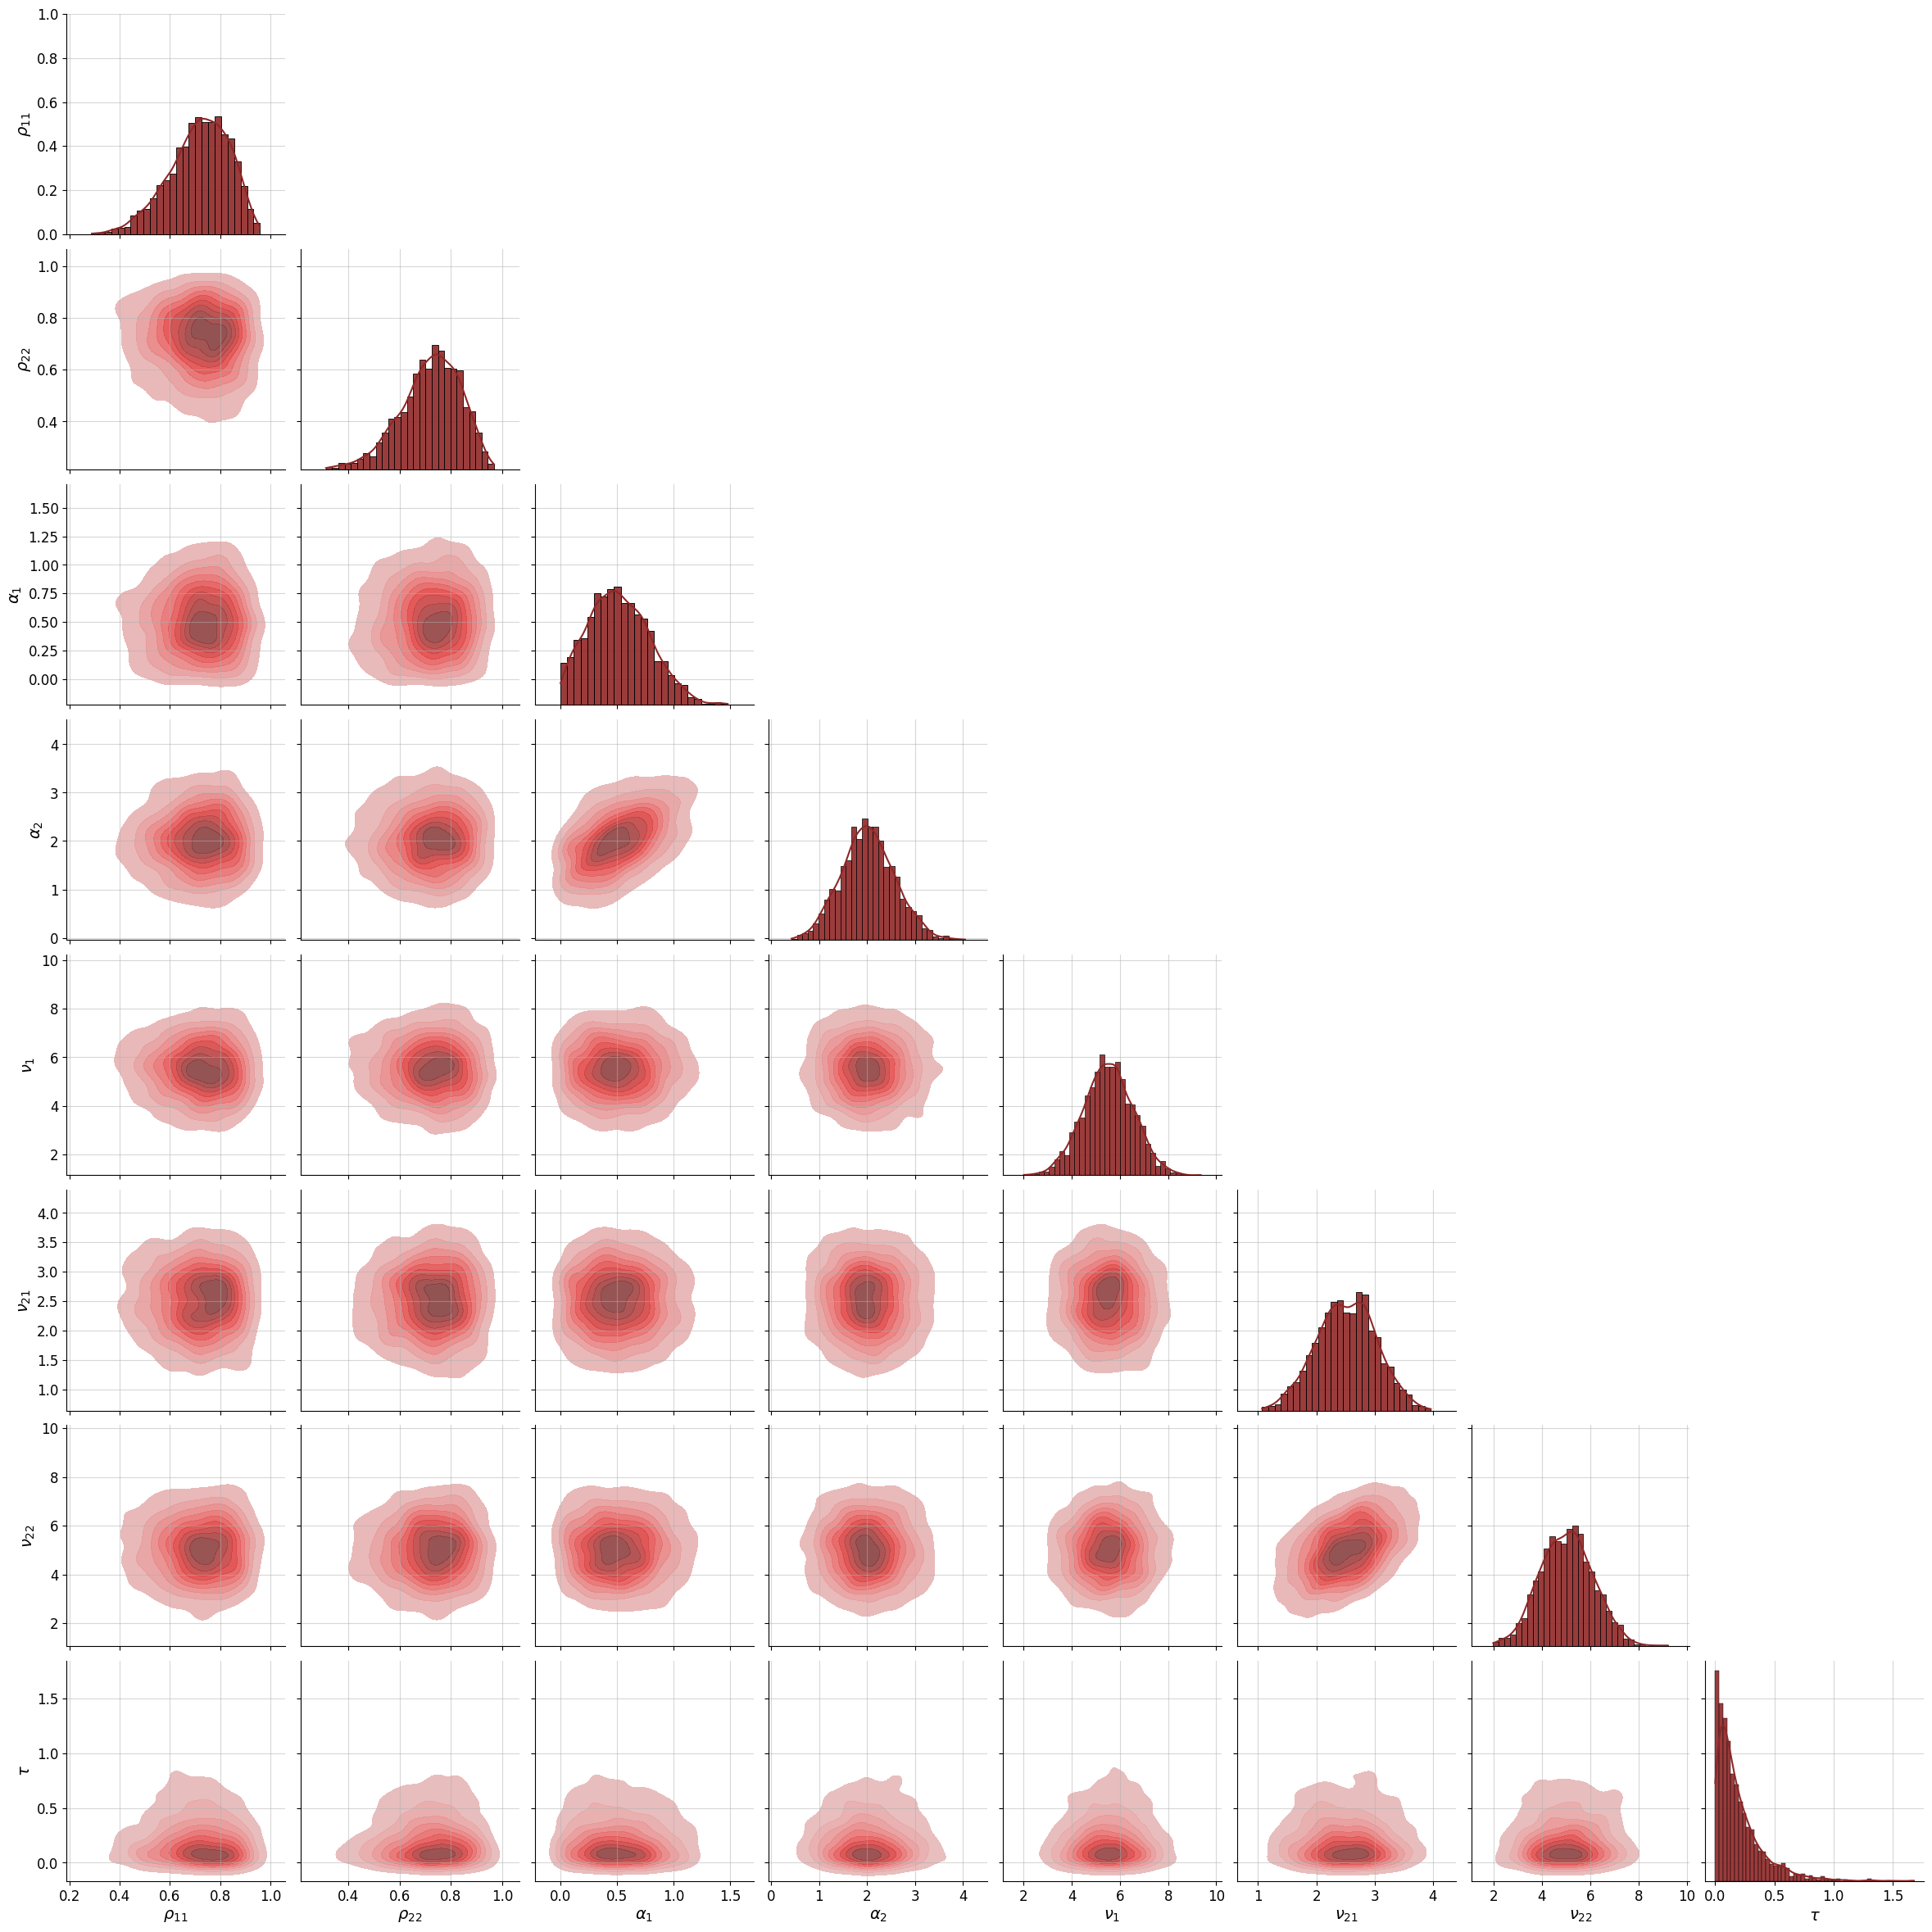

In [9]:
f=bf.diagnostics.plot_posterior_2d(constrain_parameters(unconstrain_parameters(df['prior_draws'], rts), rts), param_names=model.param_names["constrained"])

In [10]:
rts = df['sim_data'][...,0]
rts

array([[0.41431571, 0.28492417, 0.3976141 , ..., 0.0281288 , 0.13098901,
        0.45143106],
       [0.72006139, 1.07593721, 1.10330191, ..., 1.16439927, 0.71401528,
        0.72393744],
       [0.29266176, 0.13713804, 0.302588  , ..., 0.28434606, 0.22855921,
        0.34279673],
       ...,
       [0.05804391, 0.35770024, 0.18364429, ..., 0.03818285, 0.04659121,
        0.19539861],
       [0.31818054, 0.48036353, 0.20084354, ..., 0.60074365, 0.44997933,
        0.17613053],
       [0.28260624, 0.09191017, 0.21658392, ..., 0.09375013, 0.12798767,
        0.11609626]])

In [11]:
responses = df['sim_data'][...,1]
responses

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [12]:
states = df['sim_data'][...,2]
states

array([[1., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

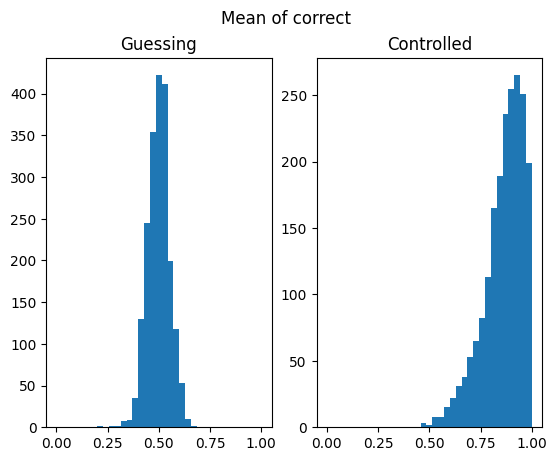

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=1)

for i, state in enumerate(['Guessing', 'Controlled']):
    f=axs[i].hist(np.nanmean(np.where(states==i, responses, np.nan), axis=1), bins=np.linspace(0, 1, 36))
    f=axs[i].set_title(state)
f=fig.suptitle("Mean of correct")

/var/folders/vn/tvq3_rgx63795x08zmwtn_rr0000gn/T/ipykernel_19729/3755053843.py:8: RuntimeWarning: Mean of empty slice
  f=axs[i,j].hist(np.nanmean(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)


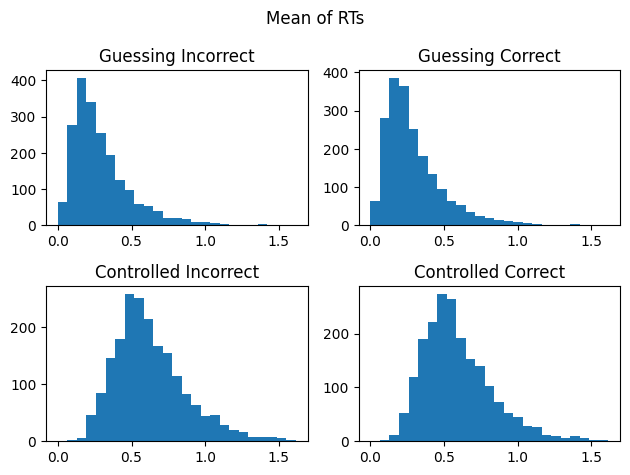

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2)

bins = np.linspace(0.0, np.quantile(np.mean(rts, axis=-1), q=0.999), 26)

for i, state in enumerate(['Guessing', 'Controlled']):
    for j, response in enumerate(['Incorrect', 'Correct']):
        f=axs[i,j].set_title("{} {}".format(state, response))
        f=axs[i,j].hist(np.nanmean(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)
f=fig.suptitle("Mean of RTs")
f=fig.tight_layout()

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


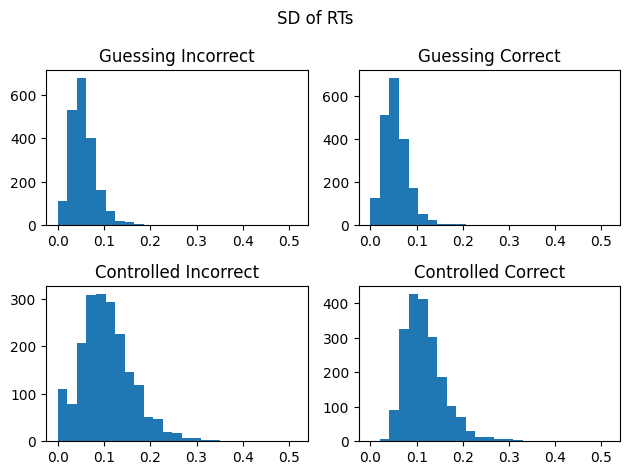

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=2)

bins = np.linspace(0.0, np.quantile(np.std(rts, axis=-1), q=0.999), 26)

for i, state in enumerate(['Guessing', 'Controlled']):
    for j, response in enumerate(['Incorrect', 'Correct']):
        f=axs[i,j].set_title("{} {}".format(state, response))
        f=axs[i,j].hist(np.nanstd(np.where(np.all([states==i, responses==j], axis=0), rts, np.nan), axis=1), bins=bins)
f=fig.suptitle("SD of RTs")
f=fig.tight_layout()